# **Overlay and Cross Correlation of different Traces**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read, read_inventory
from obspy import UTCDateTime
from obspy.signal.cross_correlation import correlate
from obspy.signal.cross_correlation import xcorr_max

Read files with streams and traces to compare

3 Trace(s) in Stream:
BK.BK69.00.HHE | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples
BK.BK69.00.HHN | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples
BK.BK69.00.HHZ | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples
3 Trace(s) in Stream:
BK.BK69.00.HNE | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples
BK.BK69.00.HNN | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples
BK.BK69.00.HNZ | 2020-10-07T11:47:35.000470Z - 2020-10-07T11:47:50.000470Z | 100.0 Hz, 1501 samples


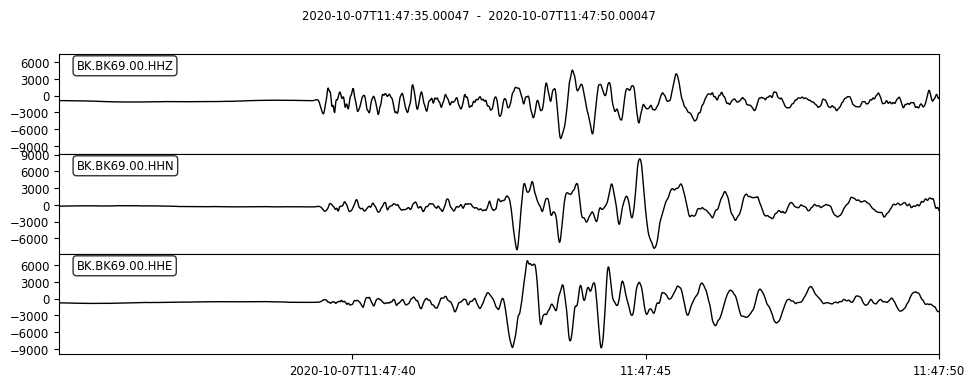

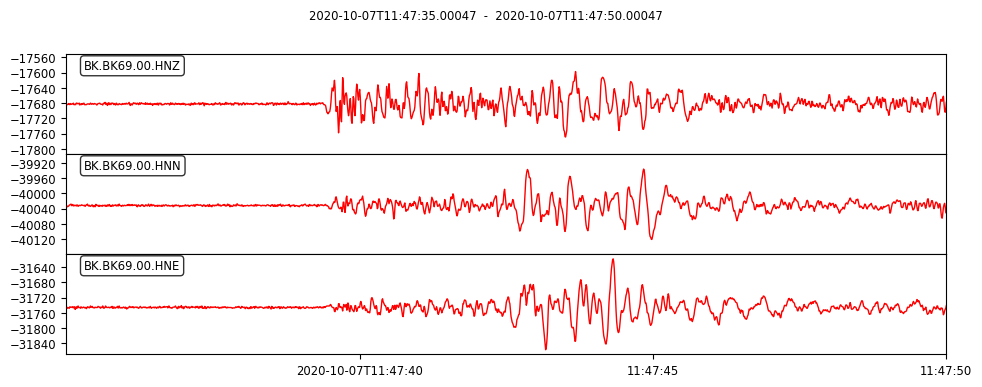

In [2]:
str1 = read("./../Q8/Vel/BK69-*")
str2 = read("./../Q8/Acc/BK69-*")
print(str1.__str__(extended=True))
print(str2.__str__(extended=True))
#create overview plots full length of file
str1.plot(color='black',size=(1000,400),equal_scale=True)
str2.plot(color='red',size=(1000,400),equal_scale=True)
numpoints=(str1[0].stats.npts)

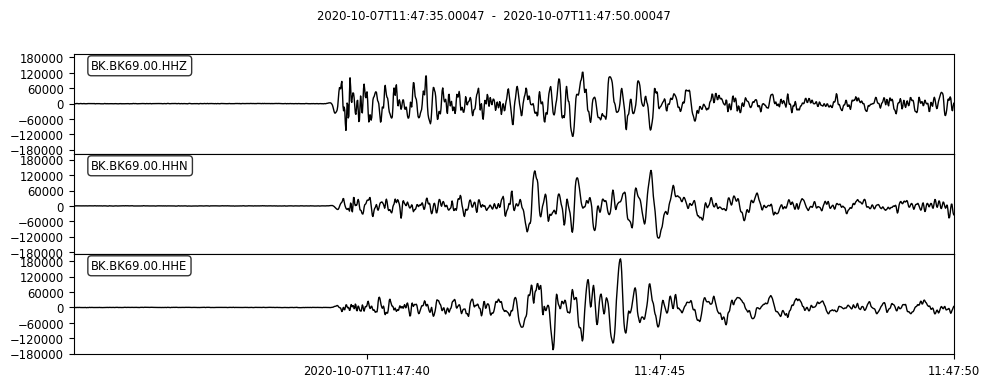

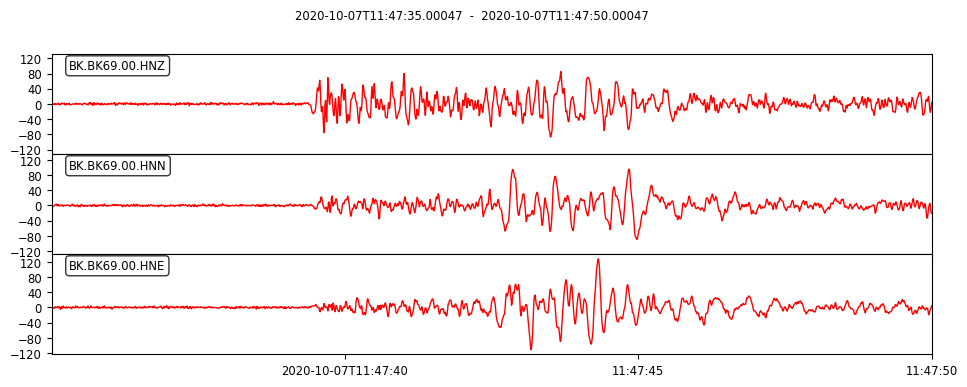

In [3]:
# differentiate HHn-components to make them comparable to HNn


str1_diff=str1.copy()
str1_diff.differentiate()

#remove offset of HNn-components
str2.detrend('demean')


#plot the two traces to be compared

str1_diff.plot(color='black',size=(1000,400),equal_scale=True)
str2.plot(color='red',size=(1000,400),equal_scale=True)

#adjust the amplitudes of the two traces
tr0=str2[0]
tr1=str2[1]
tr2=str2[2]
tr0.data=tr0.data*1000
tr1.data=tr1.data*1000
tr2.data=tr2.data*1000

Plot overlay traces for each component

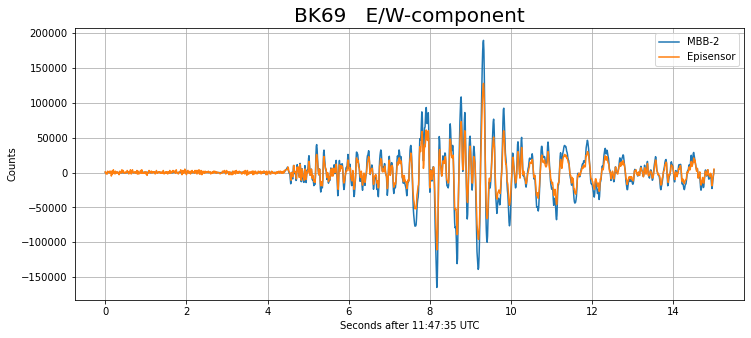

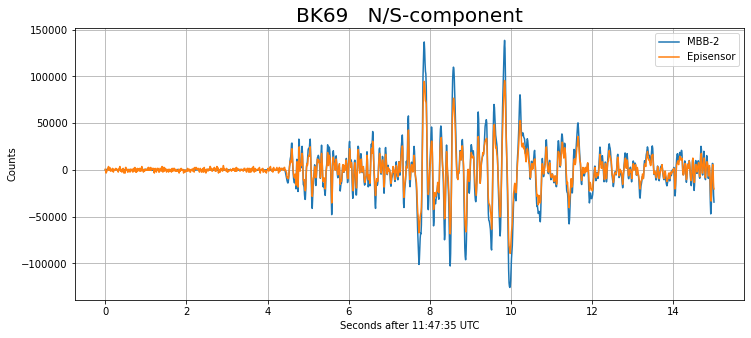

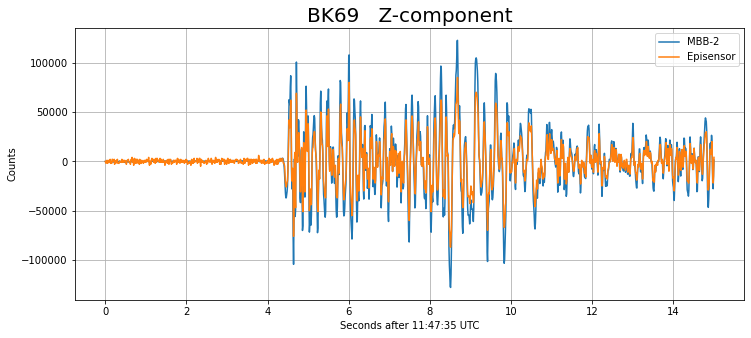

In [5]:
#prepare Time axis

t=np.zeros(str1[0].stats.npts)
for i in range (str1[0].stats.npts):
    t[i]=i/100

for i in range (3):
    if i==2:
        plt.title ("BK69   Z-component", fontsize=20)
    if i==1:
        plt.title ("BK69   N/S-component", fontsize=20)
    if i==0:
        plt.title ("BK69   E/W-component", fontsize=20)
                
    plt.rcParams['figure.figsize'] = [12, 5]
    plt.plot (t,str1_diff[i],label="MBB-2")
    plt.plot (t,str2[i],label="Episensor")
    plt.ylabel('Counts')
    plt.xlabel("Seconds after 11:47:35 UTC")
    plt.grid()
    plt.legend()
    plt.show()
  

Compute Cross Correlation value and time shift to reach optimum cross correlation




Cross Correlation Coefficients / shift # of samples

          E/W-component, blue
           0.99291 0
          N/S-component, orange
           0.99099 0
          Z-component, green
           0.98742 0





C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\scipy\signal\signaltools.py:492: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\scipy\signal\signaltools.py:492: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\scipy\signal\signaltools.py:492: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]`

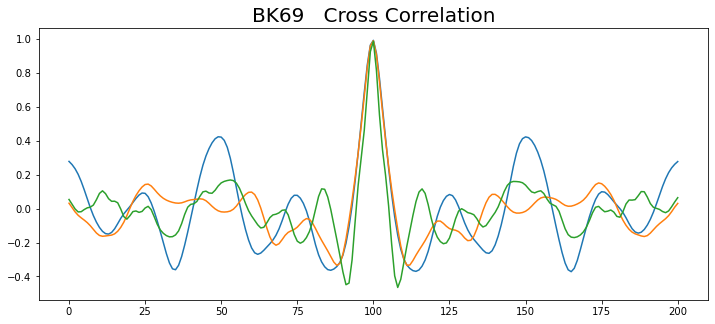

In [6]:
print ()
print ()
print ()
print ("Cross Correlation Coefficients / shift # of samples")
print ()

plt.title ("BK69   Cross Correlation", fontsize=20)
for k in range (3):
    if k==0: 
        print ("          E/W-component, blue")
    if k==1:  
        print ("          N/S-component, orange")  
    if k==2:
        print ("          Z-component, green") 

    veldiff = str1_diff[k].data
    acc = str2[k].data
    corr = correlate (veldiff,acc,100)
    shift, value = xcorr_max(corr)
    print ("       ","%10.5f" % value,shift)
    plt.plot (corr)
print ()
print ()
print ()